In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# loading and reading the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# checking the first 5 rows of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# here checking the last 5 rows of the data

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
# getting the general information about the data like data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking if there are any null or NaN values in the dataset or not
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# now let's check the distribution of the normal transactions and fraud trandaction 

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Here 0 represents the normal transactions and 1 represents fraud transactions
- And we can see that, this is imbalanced dataset as there are two types of target variables and from that more than 98 to 99% of the data is present in the first variabel only
- And for that we can use different techniques to deal with the imbalance dataset like under sampling or over sampling 

#### As we have right dataset to perform the training and testing so that we can build our model
#### So, now we will store the independent and dependent variable into new variable

In [9]:
# storing the independent and dependent features

X = df.drop('Class', axis=1)

y = df['Class']

In [10]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### Now, here as we have stored the indepedent and dependent variable into the new variable so now we will split the dataset into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_predlr = lr.predict(X_test)

In [17]:
# checking the accuracy on training data
Y_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 0.9985905178467527


In [18]:
accuracy_score(y_test, y_predlr)

0.9987008883115059

In [19]:
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.60      0.57      0.58       136

    accuracy                           1.00     85443
   macro avg       0.80      0.79      0.79     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
confusion_matrix(y_test, y_predlr)

array([[85254,    53],
       [   58,    78]], dtype=int64)

- Now, after this we can see the confusion matrix that, TP records are high and TN records are low but the FN and FP records are little bit high
- And our main goal is to lower the value of the FN and FP 
- And for that we can use different techniques and as our dataset is imbalance so here we can use different sampling techniques

#### Now we will use CV and some hyperparameter to deal with this data and then I will check the new score of the model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [22]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None, shuffle=False)

In [23]:
clf = GridSearchCV(log_class, grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [24]:
clf.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.82896328        nan 0.84122373        nan 0.83676396
        nan 0.84223538        nan 0.8457606 ]
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [25]:
y_predlrgrid = clf.predict(X_test)
print(confusion_matrix(y_test,y_predlrgrid))
print(accuracy_score(y_test,y_predlrgrid))
print(classification_report(y_test,y_predlrgrid))

[[85261    46]
 [   55    81]]
0.9988179254005595
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.60      0.62       136

    accuracy                           1.00     85443
   macro avg       0.82      0.80      0.81     85443
weighted avg       1.00      1.00      1.00     85443



## RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# checking the accuracy on training data
Y_train_rfprediction = rfclassifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_rfprediction,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 1.0


In [28]:
# accuracy score and classification report of the Random Forest
y_predrfclassifier = rfclassifier.predict(X_test)
print(confusion_matrix(y_test,y_predrfclassifier))
print(accuracy_score(y_test,y_predrfclassifier))
print(classification_report(y_test,y_predrfclassifier))

[[85298     9]
 [   28   108]]
0.9995669627705019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.79      0.85       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Now, I will use oversampling and then use the Random Forest Classifier model to check the score again  and I will check again the FN and FP 

In [29]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [30]:
os = RandomOverSampler(0.75)
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

C:\Users\Dell\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fitCounter({0: 199008, 1: 356})
The number of classes after fitCounter({0: 199008, 1: 149256})


In [31]:
from sklearn.ensemble import RandomForestClassifier
osrfclassifier = RandomForestClassifier()
osrfclassifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [32]:
y_predosrf = osrfclassifier.predict(X_test)
print(confusion_matrix(y_test,y_predosrf))
print(accuracy_score(y_test,y_predosrf))
print(classification_report(y_test,y_predosrf))

[[85301     6]
 [   26   110]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## AUC ROC Curve 

### Logistic Classifier 

In [33]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import auc, roc_curve

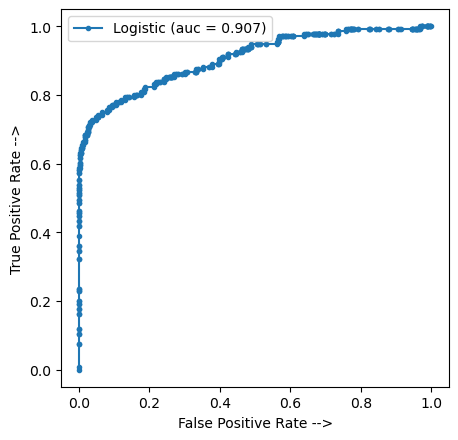

In [39]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()